# EOS 491 // EOS 518: Assignment 1.2

__Question 1(5)__

Make a plot showing topography (y-axis) versus distance (x-axis) for your model at the start,after 500 years, and after 50,000 years.

__Answer:__

The Crank-Nicholson implicit solution to the diffusion equation is of the form:

\begin{gather}
 \begin{bmatrix}
1+2r & -r & 0 \\
-r & 1+2r & -r \\
0 & -r & 1+2r
\end{bmatrix}
\begin{bmatrix}
h_0^{t+\Delta T}\\
h_i^{t+\Delta T} \\
h_n^{t+\Delta T}
\end{bmatrix}
 =
 \begin{bmatrix}
1-2r & r & 0 \\
r & 1-2r & r \\
0 & r & 1-2r
\end{bmatrix}
\begin{bmatrix}
h_0\\
h_i \\
h_n
\end{bmatrix}
+ 2r 
\begin{bmatrix}
b_0\\
b_i \\
b_n
\end{bmatrix}
\end{gather}

Where $r = \frac{K \Delta T}{2 \Delta x^2}$, $b$ is vector of boundary conditions. 

Let's start making the plot. 

100%|██████████| 50000/50000 [00:51<00:00, 975.58it/s] 


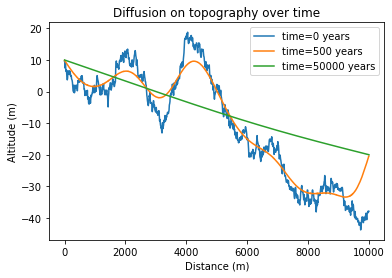

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from tqdm import tqdm

#set your random number seed to 2:
np.random.seed(2)

#initial topography (1000 length covers 10 km with dx=10):
topography = np.cumsum(np.random.normal(0,1,1000))+10
x = np.arange(0, 10000, 10)

#fix right and left boundaries
boundary_vector = np.zeros(1000)
boundary_vector[0] = 10
boundary_vector[-1] = -20

#set diffusivity, time and distance steps, and matrices
K, dx, dt = 2e2, 10,10
r = (K*dt)/(2*dx**2)
B = diags([r, 1-2*r, r], [-1, 0, 1], shape=(1000, 1000)).toarray()
A = diags([-r, 1+2*r, -r], [-1, 0, 1], shape=(1000, 1000)).toarray()

#calculate inverse of A
invA = np.linalg.inv(A)
b = 2 * r * boundary_vector

#solve system of equations for tmax time steps and make plots
tmax = int(50000 *10 / dt +1)
plt.plot(x, topography, label='time=0 years')
for t in tqdm(range(1,tmax)):
    topography = invA.dot((B.dot(topography) + b))
    if t * dt==500 or t * dt==50000:
        plt.plot(x, topography, label='time='+str(t * dt)+ ' years')
plt.xlabel('Distance (m)')
plt.ylabel('Altitude (m)')
plt.title('Diffusion on topography over time')
plt.legend();

From the above plot we can see that the steady state to the diffusion equation is a line between the left and right boundary conditions.

For this part I used a time step of 10 years, and I ran the code for 500,000 years to make sure that the steady state was achieved.

__Question 2(5)__

Starting with the equilibrium topography (the 50,000 year surface) from question 1, introduce a constant sediment flux of 10 m2 per year at the coastline (where topography first drops below 0). Make a plot showing the new topography (y-axis) versus distance (x-axis) for your model after 50 years, and after 1,000 years.

__Answer:__

For this part I will use a time step of 1 year because for greater time steps, the are instabilities. In order to introduce the flux of $10m^2$ per year, we have to find the point where the topography falls below zero $h_i$. Then we have to add the effect of the flux on the height at that point with the following equation: $h_i = h_i + \frac{\Delta t}{\Delta x} 10m^2/year$. Here is the code to do it:

100%|██████████| 1000/1000 [00:01<00:00, 926.00it/s]


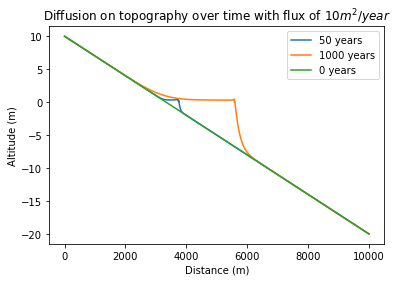

In [2]:
#make copy of steady state topography
topography_flux = topography.copy()

#reset time step and associated variables
dt = 1
r = (K*dt)/(2*dx**2)
B = diags([r, 1-2*r, r], [-1, 0, 1], shape=(1000, 1000)).toarray()
A = diags([-r, 1+2*r, -r], [-1, 0, 1], shape=(1000, 1000)).toarray()
invA = np.linalg.inv(A)
b = 2*r * boundary_vector

#calculate solution for tmax time steps
tmax = int(1000 / dt +1)

for t in tqdm(range(1,tmax)):
    #find the point where topography is less than zero
    index = np.where(topography_flux <0)[0][0]

    #introduce the flux
    topography_flux[index] += 10 * dt / dx

    #solve equations
    topography_flux = invA.dot((B.dot(topography_flux) + b))

    #make plots
    if t*dt==50 or t*dt==1000: 
        plt.plot(x, topography_flux, label=str(t*dt) + ' years')
plt.plot(x, topography, label='0 years')
plt.xlabel('Distance (m)')
plt.ylabel('Altitude (m)')
plt.title('Diffusion on topography over time with flux of $10m^2/year$')
plt.legend();

__Question 3(2)__

Show that the amount of sediment added (your flux multiplied by time) is equal to the total change in topography.

__Answer:__

The total amount of sediment added is $10m^2/year * 1000 years = 10,000 m^2$. The total change in topography can be calculated as the difference in areas between the steady state topography, and the topography with the flux after 1000 years. The following code calculates this difference:

In [3]:
topography_diff = abs(np.trapz(x,topography_flux)-np.trapz(x,topography))
print(f'The change in topography is: {topography_diff}')

The change in topography is: 10000.025087997754


This numbers are approximately the same, so this shows that the amount of sediment is equal to the total change in topography